# Air Pollution API
- https://openweathermap.org/api/air-pollution

The API returns data about polluting gases, such as Carbon monoxide (CO), Nitrogen monoxide (NO), Nitrogen dioxide (NO2), Ozone (O3), Sulphur dioxide (SO2), Ammonia (NH3), and particulates (PM2.5 and PM10).

## EDA - Contaminación del Aire en Nueva York

Este EDA se enfoca en examinar las variables de contamicaión relevantes que podrían impactar en el transporte de vehículos en la ciudad de Nueva York.

### Coordenadas Geográficas

Las coordenadas geográficas de Nueva York son las siguientes:

- **Latitud:** 40.714°
- **Longitud:** -74.006°

### Rango de Fechas

El análisis abarca el período comprendido entre:

- **Fecha de inicio:** 2020-11-27
- **Fecha de fin:** 2023-12-31

### Estructura del Diccionario

- **coord:** Coordinates from the specified location (latitude, longitude)
- **list**
  - **dt:** Date and time, Unix, UTC
- **main**
  - **main.aqi:** Air Quality Index. Possible values: 1, 2, 3, 4, 5. Where 1 = Good, 2 = Fair, 3 = Moderate, 4 = Poor, 5 = Very Poor. If you want to recalculate Air Quality indexes according UK, Europe, USA and Mainland China scales please use "Air Pollution Index levels scale" page
- **components**
  - **components.co:** Concentration of CO (Carbon monoxide), μg/m3
  - **components.no:** Concentration of NO (Nitrogen monoxide), μg/m3
  - **components.no2:** Concentration of NO2 (Nitrogen dioxide), μg/m3
  - **components.pm2_5:** Concentration of PM2.5 (Fine particles matter), μg/m3
  - **components.pm10:** Concentration of PM10 (Coarse particulate matter), μg/m3

In [1]:
import pandas as pd
from datetime import datetime
import requests

In [2]:
# Definir la fecha
fecha_start = datetime(2020, 11, 27)
fecha_end = datetime(2023, 12, 31)

# Obtener el timestamp
timestamp_start = int(fecha_start.timestamp())
timestamp_end = int(fecha_end.timestamp())

print(f'timestamp_start: {timestamp_start}')
print(f'timestamp_end: {timestamp_end}')

timestamp_start: 1606453200
timestamp_end: 1703998800


In [3]:
# Define las coordenadas y el timestamp (dt) en formato Unix
lat = 40.714
lon = -74.006
start = timestamp_start
end = timestamp_end
api_key = '32ac2c365a2bebaea6273988ff6c9db6'  # Reemplaza 'tu_clave_de_api' con tu clave de API de OpenWeatherMap

# URL de la API
url = f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start}&end={end}&appid={api_key}'

# Realiza la solicitud a la API
response = requests.get(url)

In [4]:
datos_json = response.json()

# Extraer la lista de diccionarios dentro de la clave 'list'
lista_datos = datos_json['list']

# Convertir la lista de diccionarios a un DataFrame
df = pd.json_normalize(lista_datos)


In [5]:
df.head()

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1606453200,2,600.82,40.68,34.96,0.0,3.40,16.77,25.20,1.39
1,1606456800,2,547.41,35.32,31.53,0.0,3.34,14.85,22.09,1.31
2,1606460400,2,520.71,32.19,28.45,0.0,3.22,14.19,20.84,1.39
3,1606464000,2,514.03,34.42,25.71,0.0,3.22,14.82,21.53,1.54
4,1606467600,2,534.06,39.34,24.68,0.0,3.46,16.28,23.39,1.74


In [6]:
# Convertir la columna timestamp a datetime
df['dt'] = pd.to_datetime(df['dt'], unit='s')

# Seleccionamos las variables contaminantes que son producidas por el tráfico
df = df[['dt', 'main.aqi','components.co','components.no', 'components.no2',
        'components.pm2_5','components.pm10']]

df.head()

,dt,main.aqi,components.co,components.no,components.no2,components.pm2_5,components.pm10
0,2020-11-27 05:00:00,2,600.82,40.68,34.96,16.77,25.20
1,2020-11-27 06:00:00,2,547.41,35.32,31.53,14.85,22.09
2,2020-11-27 07:00:00,2,520.71,32.19,28.45,14.19,20.84
3,2020-11-27 08:00:00,2,514.03,34.42,25.71,14.82,21.53
4,2020-11-27 09:00:00,2,534.06,39.34,24.68,16.28,23.39


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26809 entries, 0 to 26808
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                26809 non-null  datetime64[ns]
 1   main.aqi          26809 non-null  int64         
 2   components.co     26809 non-null  float64       
 3   components.no     26809 non-null  float64       
 4   components.no2    26809 non-null  float64       
 5   components.pm2_5  26809 non-null  float64       
 6   components.pm10   26809 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.4 MB


In [10]:
df.describe()

,dt,main.aqi,components.co,components.no,components.no2,components.pm2_5,components.pm10
count,26809,26809.000000,26809.000000,26809.000000,26809.000000,26809.000000,26809.000000
mean,2022-06-13 16:24:16.839121152,2.164087,510.159408,21.980649,40.719957,17.143872,22.352091
min,2020-11-27 05:00:00,1.000000,178.580000,0.000000,2.310000,0.500000,0.660000
25%,2021-09-03 11:00:00,1.000000,307.080000,0.190000,20.220000,4.500000,6.460000
50%,2022-06-11 17:00:00,2.000000,387.190000,2.490000,34.620000,9.840000,13.640000
75%,2023-03-24 23:00:00,3.000000,540.730000,16.540000,55.520000,19.690000,25.520000
max,2023-12-31 05:00:00,5.000000,5500.790000,729.560000,271.440000,368.430000,430.840000
std,NaN,1.154300,391.151898,53.240983,26.756154,23.963106,29.684807


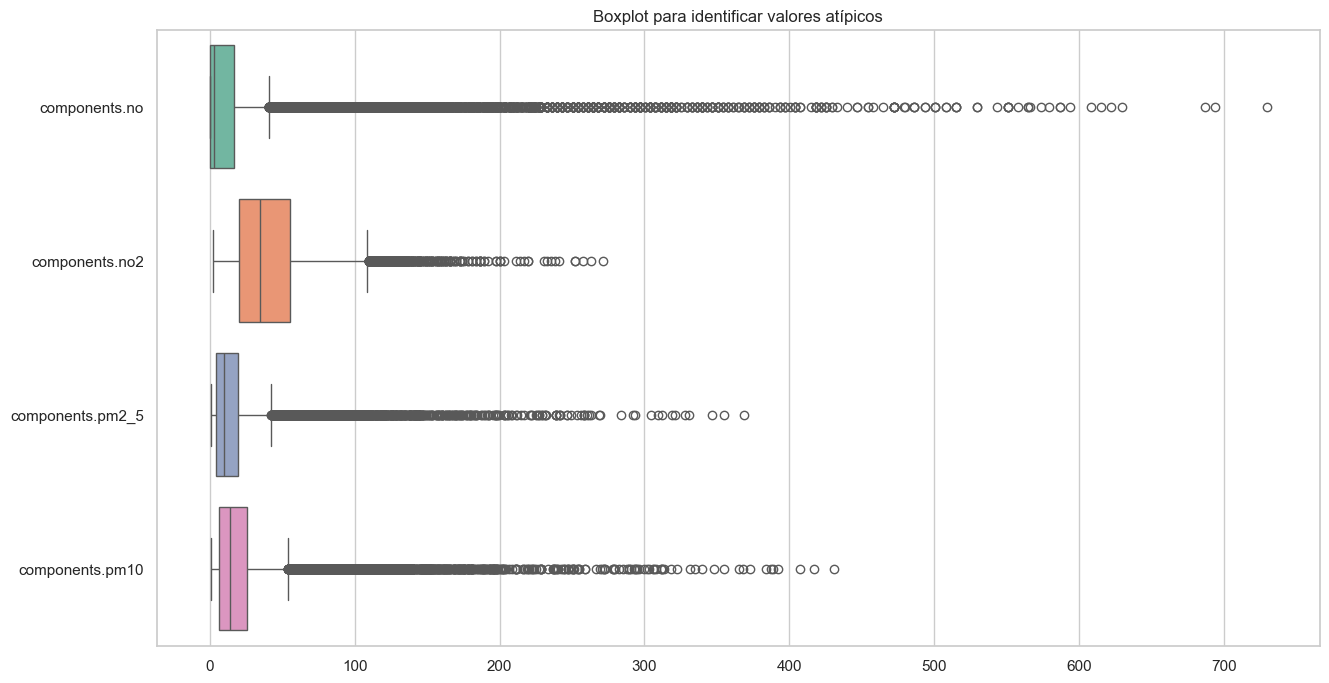

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subgráficos de caja para cada columna numérica
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['components.co', 'main.aqi']), orient="h", palette="Set2")

# Mostrar el gráfico
plt.title("Boxplot para identificar valores atípicos")
plt.show()

In [12]:
# Agrupamos nuestras mediciones por el promedio semanal
semanal = df.resample('W', on = 'dt').mean()

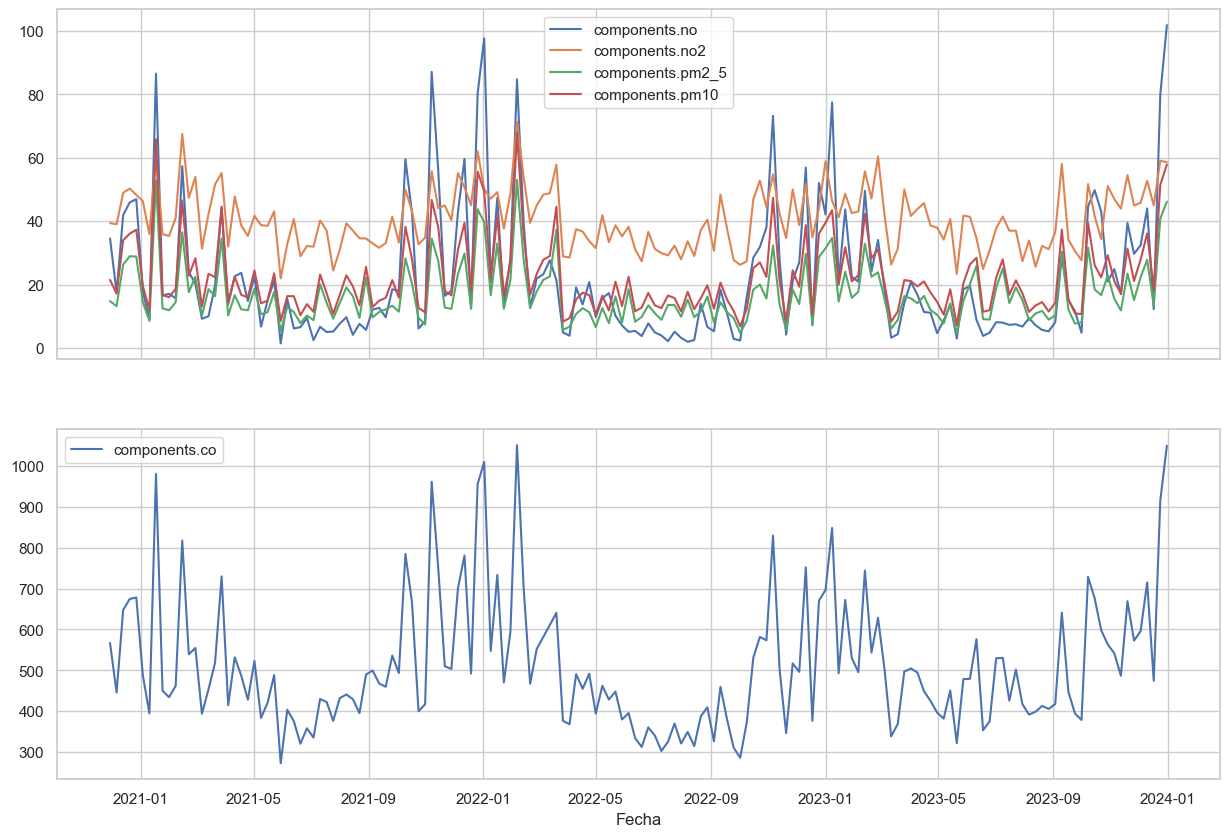

In [18]:
# Crear la figura y los subgráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Primer gráfico (superior)
ax1.plot(semanal.index, semanal['components.no'], label='components.no')
ax1.plot(semanal.index, semanal['components.no2'], label='components.no2')
ax1.plot(semanal.index, semanal['components.pm2_5'], label='components.pm2_5')
ax1.plot(semanal.index, semanal['components.pm10'], label='components.pm10')
ax1.set_ylabel('')

# Segundo gráfico (inferior)
ax2.plot(semanal.index, semanal['components.co'], label='components.co')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('')

# Ajustes y leyendas
ax1.legend()
ax2.legend()

# Mostrar la figura
plt.show()

De acuerdo a los gráficos de las variables de contaminación, en general, los outliers no serán removidos o reemplazados por lo siguiente:
- Aportan información valiosa en cuanto a eventos inusuales o situaciones extremas.
- Eventos extremos o contaminación elevada durante mayor demanda de tráfico.

Resultado del Dataset:
- No hay presencia de nulos
- Los tipos de datos son correctos 

In [19]:
df.head()

,dt,main.aqi,components.co,components.no,components.no2,components.pm2_5,components.pm10
0,2020-11-27 05:00:00,2,600.82,40.68,34.96,16.77,25.20
1,2020-11-27 06:00:00,2,547.41,35.32,31.53,14.85,22.09
2,2020-11-27 07:00:00,2,520.71,32.19,28.45,14.19,20.84
3,2020-11-27 08:00:00,2,514.03,34.42,25.71,14.82,21.53
4,2020-11-27 09:00:00,2,534.06,39.34,24.68,16.28,23.39


### Estructura del Diccionario

- **dt:** Datetime 
- **main.aqi:** Air Quality Index. Possible values: 1, 2, 3, 4, 5. Where 1 = Good, 2 = Fair, 3 = Moderate, 4 = Poor, 5 = Very Poor. If you want to recalculate Air Quality indexes according UK, Europe, USA and Mainland China scales please use "Air Pollution Index levels scale" page
- **components.co:** Concentration of CO (Carbon monoxide), μg/m3
- **components.no:** Concentration of NO (Nitrogen monoxide), μg/m3
- **components.no2:** Concentration of NO2 (Nitrogen dioxide), μg/m3
- **components.pm2_5:** Concentration of PM2.5 (Fine particles matter), μg/m3
- **components.pm10:** Concentration of PM10 (Coarse particulate matter), μg/m3

Consultar a Leonel Cortez por este Dataset